### This is a notebook for Cat dog image classfication with tensorflow CNN model with data augmentation, drop out.

### 1.load package - > 2.download data -> 3.data augmentation -> 4.define model -> 5.train model -> 6.model performance - > 7.save model

# 1.load package

### import tensorflow package and check tensorflow version

In [1]:
import tensorflow as tf

print(tf.__version__)

2.0.0


### import all other pakcage

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import urllib.request

import os
import zipfile
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam

Using TensorFlow backend.


# 2.download cat dog data

### download cat and dog picture from microsoft

In [3]:
urllib.request.urlretrieve("https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip", "cat_dog.zip")
#zip = ZipFile('cat_dog.zip')
#zip.extractall()

('cat_dog.zip', <http.client.HTTPMessage at 0x7ff419b7cb70>)

### unzip the file

In [4]:
import zipfile
zip_ref = zipfile.ZipFile('cat_dog.zip', 'r')
zip_ref.extractall('../output/')
zip_ref.close()

import os
os.listdir('../output/PetImages')

print('total  dog images :', len(os.listdir('../output/PetImages/Dog') ))
print('total  cat images :', len(os.listdir('../output/PetImages/Cat') ))

os.remove('../output/PetImages/Cat/666.jpg')
os.remove('../output/PetImages/Dog/11702.jpg')

total  dog images : 12501
total  cat images : 12501


## Dog picture

In [5]:
os.listdir('../output/PetImages/Dog')[1:10]

['6790.jpg',
 '4644.jpg',
 '1835.jpg',
 '1102.jpg',
 '8962.jpg',
 '6040.jpg',
 '4423.jpg',
 '12072.jpg',
 '1806.jpg']

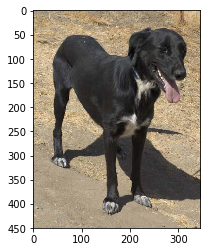

In [6]:
image = load_img('../output/PetImages/Dog/4644.jpg')
plt.imshow(image)

## Cat picture

In [7]:
os.listdir('../output/PetImages/Cat')[1:10]

['6790.jpg',
 '4644.jpg',
 '1835.jpg',
 '1102.jpg',
 '8962.jpg',
 '6040.jpg',
 '4423.jpg',
 '12072.jpg',
 '1806.jpg']

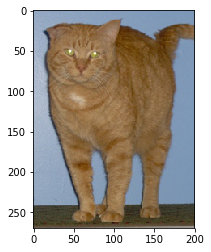

In [8]:
image = load_img('../output/PetImages/Cat/8962.jpg')
plt.imshow(image)

# 3.load data with ImageDataGenerator


<img src="https://www.pyimagesearch.com/wp-content/uploads/2019/07/keras_data_augmentation_in_place.png" width="600">

In [9]:
img_width=150
img_height=150
batch_size=20
input_shape = (img_width, img_height, 3)

In [10]:
# clean data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.3,
    zoom_range=[0.6,1.0],
    brightness_range=[0.6,1.0],
    rotation_range=90,
    horizontal_flip=True,
    validation_split=0.2
)

#---------------------------------------------

train_generator = train_datagen.flow_from_directory(
    '../output/PetImages',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    seed = 42,
    subset='training'
    
)

#---------------------------------------------

valid_generator = train_datagen.flow_from_directory(
    '../output/PetImages',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    #class_mode='binary',
    class_mode='categorical',
    seed = 42,
    subset='validation'
    
)
#X, y = next(train_generator)

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


## show picture after augmentation

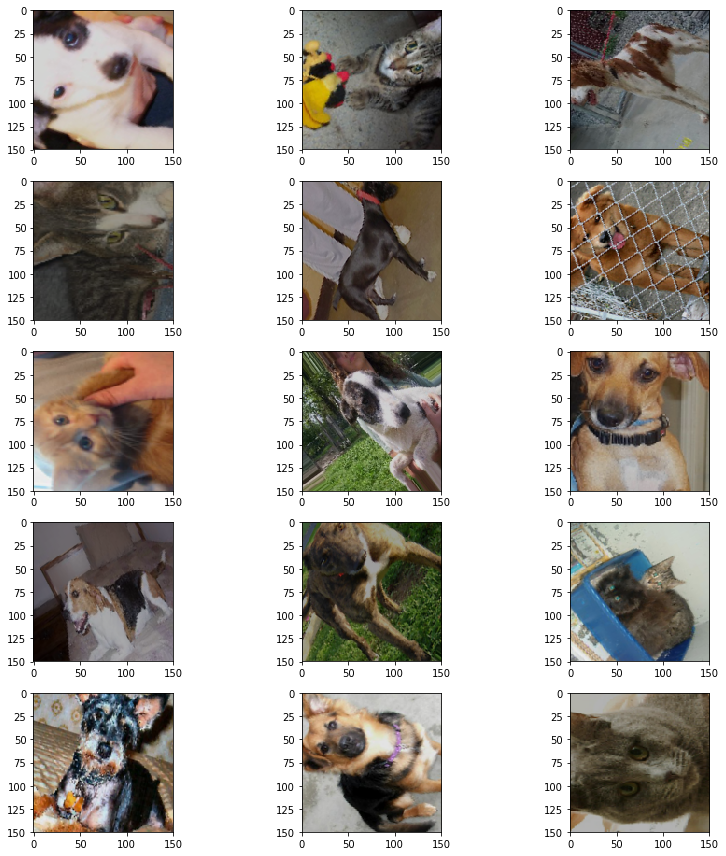

In [11]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# 4.define model

### create CNN model


<img src="https://pythonprogramming.net/static/images/machine-learning/artificial-neural-network-model.png" width="600">

<img src="https://pythonprogramming.net/static/images/machine-learning/convolution-new-featuremap.png" width="600">


In [12]:
# Feel free to add more layers or neurons if you have enough computing power
model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

model.add(Dropout(0.30))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.30))
model.add(Dense(2))
model.add(Activation("softmax"))

### compile model with Adam optimizer 

In [13]:
optimizer = Adam(lr=0.0003)
#model.compile(loss='binary_crossentropy',
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])

### set up callbacks with earlystop

In [14]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,TensorBoard

earlystop=EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=5, verbose=0, mode='auto')

#tensorboard_callback = TensorBoard(log_dir)

callbacks = [earlystop]

# 5.trainning model

### train model with 50 epochs

In [15]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf

In [16]:
history=model.fit_generator(
    train_generator,
    #steps_per_epoch=nb_train_samples // batch_size,
    validation_data=valid_generator,
    epochs=50
    ,callbacks=callbacks
  
)

Epoch 1/50
 133/1000 [==>...........................] - ETA: 3:04 - loss: 0.6944 - acc: 0.5139

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but 

 198/1000 [====>.........................] - ETA: 2:45 - loss: 0.6937 - acc: 0.5164

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expect

 346/1000 [=========>....................] - ETA: 2:09 - loss: 0.6903 - acc: 0.5277

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18350080 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:780: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 6. 
  warnings.warn(str(msg))


 542/1000 [===============>..............] - ETA: 1:28 - loss: 0.6886 - acc: 0.5348

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262146 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262151 bytes but only got 0. Skipping tag 56
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:780: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 0. 
  warnings.warn(str(msg))


 560/1000 [===============>..............] - ETA: 1:24 - loss: 0.6888 - acc: 0.5365

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 307363840 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 307888128 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 328728576 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 5357. Skipping tag 513
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expe

 822/1000 [=======================>......] - ETA: 33s - loss: 0.6823 - acc: 0.5546

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 209715200 bytes but only got 0. Skipping tag 48
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 52428800 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6468665344 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 7027. Skipping tag 48
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expe

 999/1000 [============================>.] - ETA: 0s - loss: 0.6751 - acc: 0.5679

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 425459712 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 6833. Skipping tag 513
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expe

1000/1000 [==============================] - 232s 232ms/step - loss: 0.6750 - acc: 0.5681 - val_loss: 0.6138 - val_acc: 0.6611
Epoch 2/50
1000/1000 [==============================] - 225s 225ms/step - loss: 0.5999 - acc: 0.6759 - val_loss: 0.5095 - val_acc: 0.7231
Epoch 3/50
1000/1000 [==============================] - 224s 224ms/step - loss: 0.5682 - acc: 0.7030 - val_loss: 0.6862 - val_acc: 0.6793
Epoch 4/50
1000/1000 [==============================] - 229s 229ms/step - loss: 0.5319 - acc: 0.7380 - val_loss: 0.2966 - val_acc: 0.7599
Epoch 5/50
1000/1000 [==============================] - 230s 230ms/step - loss: 0.5027 - acc: 0.7555 - val_loss: 0.7717 - val_acc: 0.7559
Epoch 6/50
1000/1000 [==============================] - 227s 227ms/step - loss: 0.4877 - acc: 0.7664 - val_loss: 0.4150 - val_acc: 0.7857
Epoch 7/50
1000/1000 [==============================] - 227s 227ms/step - loss: 0.4576 - acc: 0.7869 - val_loss: 0.6492 - val_acc: 0.7457
Epoch 8/50
1000/1000 [=======================

# 6.model result

<Figure size 432x288 with 0 Axes>

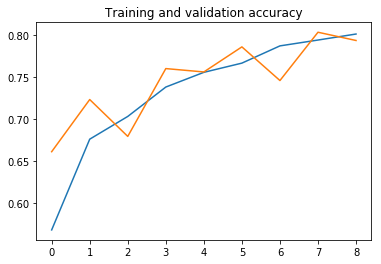

<Figure size 432x288 with 0 Axes>

In [17]:

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
#plt.plot  ( epochs,     loss )
#plt.plot  ( epochs, val_loss )
#plt.title ('Training and validation loss'   )

# 7.save model and load model

In [18]:
!pip install -q pyyaml h5py

In [19]:
# save model
from keras.models import load_model
model.save('dog_cat_cnn_model.h5')

In [20]:
from IPython.display import FileLink
FileLink(r'dog_cat_cnn_model.h5')

/kaggle/working/dog_cat_cnn_model.h5

### load the saved model

In [21]:
import keras
new_model = keras.models.load_model('dog_cat_cnn_model.h5')

### make prediction on test data

In [22]:
val_loss, val_acc = model.evaluate(valid_generator)  # evaluate the out of sample data with model
#print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

176/250 [====================>.........] - ETA: 13s

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting t

250/250 [==============================] - 45s 181ms/step
0.801520586013794


### make prediction on one image


<img src="https://dcist.com/wp-content/uploads/sites/3/2019/04/Gem2-768x689.jpg" width="400">

In [23]:
urllib.request.urlretrieve('https://dcist.com/wp-content/uploads/sites/3/2019/04/Gem2-768x689.jpg', "image.jpg")

('image.jpg', <http.client.HTTPMessage at 0x7ff3ac2a68d0>)

In [24]:
import numpy as np
import pandas as pd
#from keras_preprocessing import image
#import PIL.Image as Image
import tensorflow as tf
#import cv2
import PIL.Image as Image
x = Image.open('image.jpg').resize((150, 150))
x = np.array(x)/255.0
new_model = tf.keras.models.load_model ('dog_cat_cnn_model.h5')
result = new_model.predict(x[np.newaxis, ...])
df = pd.DataFrame(data =result,columns=['cat','dog'])
df

,cat,dog
0,0.786662,0.213338


# 8 Reference

* https://pythonprogramming.net/convolutional-neural-network-deep-learning-python-tensorflow-keras/
* https://www.coursera.org/specializations/tensorflow-in-practice
* https://www.udacity.com/course/intro-to-tensorflow-for-deep-learning--ud187
* https://www.datacamp.com/courses/introduction-to-tensorflow-in-python